In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# classes and functions from 'util'
from util.data_load import returns_load
from util.GarchEstimator import GarchEstimator

In [2]:
start_dt = '2000-01-01'
end_dt = '2020-03-01'
ticker = 'MSFT' 
interval = '1d'
garch_init = {
    'alpha' : 0.7,
    'beta' : 0.8,
    'omega' : 0.01
}

In [3]:
ret_data = returns_load(ticker=ticker,
                    interval=interval,
                    start_dt=start_dt,
                    end_dt=end_dt)

[*********************100%***********************]  1 of 1 completed


In [4]:
garch =  GarchEstimator(theta_init = garch_init)

In [5]:
ret_data['garch'] = garch.fit_data(method='GARCH',
                                       data_estimate=ret_data['return'],
                                       data_fit=ret_data['return'])
print(garch.get_estimates(coef=True, llik=True))

[0.7, 0.8, 0.01]


C:\Users\sskor\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`xtol` termination condition is satisfied.
Number of iterations: 150, function evaluations: 788, CG iterations: 225, optimality: 4.13e-03, constraint violation: 0.00e+00, execution time: 8.8e+01 s.
Model recalculated!
 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 225
      cg_stop_cond: 4
            constr: [array([1.00001379e-05, 9.86852229e-02, 8.75259662e-01])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 87.76739239692688
               fun: -13644.142725579577
              grad: array([1.16069611e+06, 5.85937500e-03, 9.52148438e-03])
               jac: [<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>]
   lagrangian_grad: array([0.00000000e+00, 5.65125048e-05, 4.12998966e-03])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_int

C:\Users\sskor\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


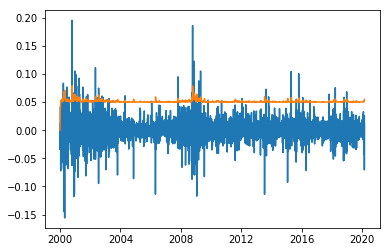

In [7]:
x = ret_data['dt']
y1 = ret_data['return']
y2 = ret_data['garch']
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()